In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
train = pd.read_csv('trgdata1.csv')
test = pd.read_csv('challenge_data.csv')

# train.columns
# test = pd.read_csv('test.csv')

/anaconda/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# cols = ['T2','P2','P15','Nf','Nc','EPR','NRf','Nrc','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']

In [5]:
# train = train.drop(cols,axis = 1)
# test = test.drop(cols,axis = 1)

In [50]:
data1 = pd.read_csv('health_index.csv')

In [52]:
HI_tree = data1['HI']

In [24]:
train = train.drop('Ops Mode',axis = 1)
# test = test.drop('Ops Mode',axis = 1)

In [25]:
TRA = train['TRA']
OpsMode = []
for x in TRA:
    if x == 0:
        OpsMode.append(1)
    if x == 20:
        OpsMode.append(2)
    if x == 40:
        OpsMode.append(3)
    if x == 60:
        OpsMode.append(4)
    if x == 80:
        OpsMode.append(5)
    if x == 100:
        OpsMode.append(6)

        

In [8]:
TRA1 = test['TRA']
OpsMode1 = []
for x in TRA1:
    if x == 0:
        OpsMode1.append(1)
    if x == 20:
        OpsMode1.append(2)
    if x == 40:
        OpsMode1.append(3)
    if x == 60:
        OpsMode1.append(4)
    if x == 80:
        OpsMode1.append(5)
    if x == 100:
        OpsMode1.append(6)
    


In [9]:
# TRA1

In [10]:
v = TRA1.unique()
# v

In [26]:
train['OpsMode'] = OpsMode
# test['OpsMode'] = OpsMode1
train = train.drop(['Altitude','Mach No','TRA'],axis=1)
# test = test.drop(['Altitude','Mach No','TRA'],axis=1)

Text(0.5, 0, 'Time')

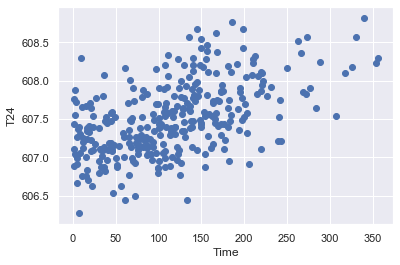

In [51]:
import seaborn as sns
%matplotlib inline
sns.set()
d = train[train['OpsMode']==1]
d = d.iloc[0:322]
y = d['T24']
x = d['Time']
ax = plt.scatter(x ,y)
plt.ylabel('T24')
plt.xlabel('Time')

In [27]:
unitlife = []
n = train['A/C No.'].nunique()


In [28]:
for i in range(1,n+1):
    k = train[train['A/C No.'] == i].shape[0]
    unitlife += k*[k]


In [29]:
train['unitlife'] = unitlife
train['Time'] = train['Time']-train['unitlife']
train = train.drop('unitlife',axis = 1)
# test = train

In [30]:
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler
%matplotlib inline


Text(0.5, 0, 'Time')

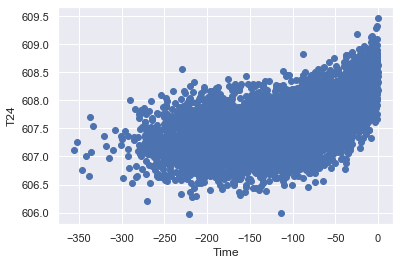

In [18]:
import seaborn as sns
sns.set()
d = train[train['OpsMode']==1]
y = d['T24']
x = d['Time']
ax = plt.scatter(x ,y)
plt.ylabel('T24')
plt.xlabel('Time')

In [16]:
cols1 = ['T2','P2','P15','Nf','Nc','EPR','NRf','Nrc','farB','htBleed','Nf_dmd','PCNfR_dmd']
PCA_train = train.drop(cols1,axis = 1)
PCA_test = test.drop(cols1,axis = 1)

In [31]:
cols = ['T2','P2','P15','Nf','Nc','EPR','NRf','Nrc','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']
train = train.drop(cols,axis = 1)
test = test.drop(cols,axis = 1)

In [18]:
X = train[train['OpsMode']==1]
Time1 = X['Time']
X = X[(X['Time']<-300) | (X['Time']>-5)]
X.shape[0]
# X
# Time1

169

In [32]:
X = train[(train['Time']<-300) | (train['Time']>-5)]
X = X.drop('A/C No.',axis = 1)

In [20]:
X.head()
X.shape[0]

1223

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [39]:
scaler = MinMaxScaler()
M = []
score = []
residual_data = []
actual_y = []
predicted_y = []
for i in range (1,7):
    Xi = X[X['OpsMode'] == i]
    Xi = Xi.drop('OpsMode',axis=1)
#     print(Xi.shape[0])
    yi = np.where(Xi['Time']>-5,0,1)
    Time = Xi['Time']
    Xi = Xi.drop('Time',axis=1)
    scaler.fit(Xi)
    Xi = scaler.transform(Xi)
    Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    Mi = regressor.fit(Xi_train,yi_train)
    yi_pred = Mi.predict(Xi_test)
    score.append(r2_score(yi_test,yi_pred))
    
    residual = yi_test-yi_pred
    residual_data.append(residual)
    actual_y.append(yi_test)
    predicted_y.append(yi_pred)
    coeff_df = pd.DataFrame(Mi.coef_, columns = ['Coefficient'])
#     print(coeff_df)
    M.append(Mi)

Text(0.5, 0, 'predicted y')

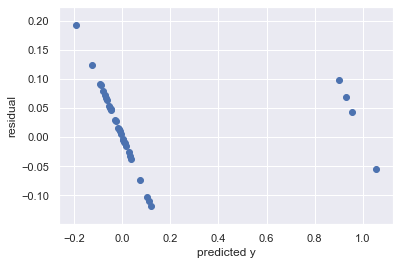

In [48]:
# residual check for linear regression
import seaborn as sns
sns.set()
y = residual_data[0]
x = predicted_y[0]
ax = plt.scatter(x ,y)
plt.ylabel('residual')
plt.xlabel('predicted y')

In [321]:

score

[0.9528724312590026,
 0.9503008982193133,
 0.9324757448014721,
 0.9404550141050213,
 0.9143505859600716,
 0.9434097021360036]

In [140]:
#with non-linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
scaler = MinMaxScaler()
M_ = []
score_ = []
for i in range (1,7):
    Xi = X[X['OpsMode'] == i]
    Xi = Xi.drop('OpsMode',axis=1)
    yi = np.where(Xi['Time']>-5,0,1)
    Time = Xi['Time']
    Xi = Xi.drop('Time',axis=1)
    scaler.fit(Xi)
    Xi = scaler.transform(Xi)
    Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.2, random_state=0)
    poly = PolynomialFeatures(degree=4)
    Xi_train = poly.fit_transform(Xi_train)
    Xi_test = poly.fit_transform(Xi_test)
    regressor = LinearRegression()
    Mi_ = regressor.fit(Xi_train,yi_train)
    yi_pred = Mi_.predict(Xi_test)
    score_.append(r2_score(yi_test,yi_pred))
    coeff_df = pd.DataFrame(Mi_.coef_, columns = ['Coefficient'])
    print(coeff_df)
    M_.append(Mi_)


In [141]:
# print(score)
# score_

In [193]:
#with non-linear regression
scaler = MinMaxScaler()
data_ = []
for i in range(1,7):
    Xi = train[train['OpsMode'] == i]
    Xii = Xi.drop(['A/C No.','OpsMode','Time'],axis = 1)
    Xi = Xi.drop(['T24','T30','T50','P30','Ps30','phi','BPR','OpsMode'],axis = 1)
    scaler.fit(Xii)
    Xii = scaler.transform(Xii)
    poly = PolynomialFeatures(degree=2)
    Xii = poly.fit_transform(Xii)
    yi = M_[i-1].predict(Xii)
    Xi['HI'] = yi
    data_.append(Xi)

In [195]:
#with non-linear regression data
df_ = pd.concat(data_)
df_.sort_index(inplace = True)

In [54]:

scaler = MinMaxScaler()
data = []
for i in range(1,7):
    Xi = train[train['OpsMode'] == i]
#     OpsMode = Xi['OpsMode']
#     Unit = Xi['A/C No.'] 
    Xii = Xi.drop(['A/C No.','OpsMode','Time'],axis = 1)
    Xi = Xi.drop(['T24','T30','T50','P30','Ps30','phi','BPR','OpsMode'],axis = 1)
    scaler.fit(Xii)
    Xii = scaler.transform(Xii)
    yi = M[i-1].predict(Xii)
    Xi['HI'] = yi
    data.append(Xi)
#     df = pd.DataFrame([Unit,OpsMode,yi],columns = ['A/C No.','OpsMode','HI'])
#     print(Xi)


In [55]:
df = pd.concat(data)
df.sort_index(inplace = True)

In [60]:
#for residual check with hi from decision tree
HI_linear = df['HI']

Text(0.5, 0, 'predicted HI')

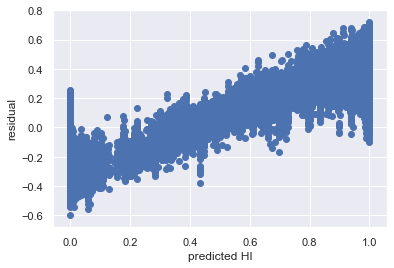

In [59]:
import seaborn as sns
sns.set()
y = HI_tree - HI_linear
x = HI_tree
ax = plt.scatter(x,y)
plt.ylabel('residual')
plt.xlabel('predicted HI')

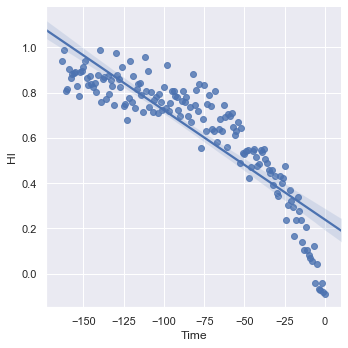

In [20]:
#with linear data
import seaborn as sns
sns.set()
d = df[df['A/C No.']==2]
ax = sns.lmplot(x = 'Time',y = 'HI',data = d)

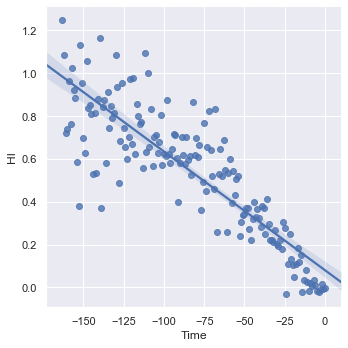

In [200]:
#with non-linear data
import seaborn as sns
sns.set()
d_ = df_[df_['A/C No.']==2]
ax = sns.lmplot(x = 'Time',y = 'HI',data = d_)

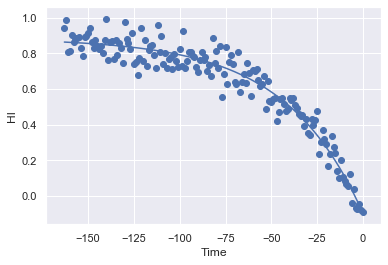

In [22]:
from scipy.optimize import curve_fit
def func(x,a,b,c,d):
    return a*(np.exp(b*x+c)-np.exp(c))+d
x = np.array(d['Time'])
y = d['HI']
popt, pcov = curve_fit(func,x,y)
plt.plot(x,func(x,*popt))
plt.ylabel('HI')
plt.xlabel('Time')
plt.scatter(x,y)
# print(popt)
# print(pcov)

In [58]:
from scipy.optimize import curve_fit
def func(x,a,b):
    return a*x+b
fitted_curve_parameters = []
covariance = []
for i in range(1,n+1):
    data = df[df['A/C No.'] == i]
    x = np.array(data['Time'])
    y = np.array(data['HI'])
    popt, pcov = curve_fit(func,x,y)
    fitted_curve_parameters.append(popt)
    covariance.append(pcov)
    

In [60]:
test.head()

,A/C No.,Time,T24,T30,T50,P30,Ps30,phi,BPR,OpsMode
0,1,-222,604.13,1499.45,1309.95,394.88,45.40,372.15,8.6216,2
1,1,-221,642.13,1584.55,1403.96,553.67,47.29,521.81,8.3907,6
2,1,-220,555.42,1368.17,1122.49,194.93,41.92,183.26,9.3557,4
3,1,-219,607.03,1488.44,1249.18,334.82,44.26,314.84,9.2231,1
4,1,-218,549.52,1354.48,1124.32,138.24,41.79,130.44,9.2986,3


In [61]:
scaler = MinMaxScaler()
data = []
for i in range(1,7):
    Xi = test[test['OpsMode'] == i]
    Xii = Xi.drop(['A/C No.','OpsMode'],axis = 1)
    Xi = Xi.drop(['T24','T30','T50','P30','Ps30','phi','BPR','OpsMode'],axis = 1)
    scaler.fit(Xii)
    Xii = scaler.transform(Xii)
    yi = M[i-1].predict(Xii)
    Xi['HI'] = yi
    data.append(Xi)

In [65]:
df_test = pd.concat(data)
df_test.sort_index(inplace = True)

,A/C No.,Time,HI
0,1,-222,0.692859
1,1,-221,0.698001
2,1,-220,0.697120
3,1,-219,0.673532
4,1,-218,0.675802
...,...,...,...
45913,218,-4,0.002526
45914,218,-3,0.001872
45915,218,-2,-0.006154
45916,218,-1,-0.002291


In [300]:
X_new = PCA_train
X_new.shape[0]
X_new

,A/C No.,Time,T24,T30,T50,P30,Ps30,phi,BPR,W31,W32,OpsMode
0,1,-222,604.13,1499.45,1309.95,394.88,45.40,372.15,8.6216,28.58,17.1735,2
1,1,-221,642.13,1584.55,1403.96,553.67,47.29,521.81,8.3907,38.99,23.3619,6
2,1,-220,555.42,1368.17,1122.49,194.93,41.92,183.26,9.3557,14.83,8.8555,4
3,1,-219,607.03,1488.44,1249.18,334.82,44.26,314.84,9.2231,24.42,14.7832,1
4,1,-218,549.52,1354.48,1124.32,138.24,41.79,130.44,9.2986,10.99,6.4025,3
...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,-4,551.02,1365.27,1147.43,137.97,42.68,130.21,9.4672,10.57,6.2985,3
45914,218,-3,550.07,1365.55,1142.21,137.56,42.62,130.24,9.4619,10.40,6.2741,3
45915,218,-2,549.92,1359.21,1150.15,138.05,42.83,129.86,9.4827,10.37,6.1978,3
45916,218,-1,556.55,1380.05,1145.49,194.59,42.61,182.03,9.4212,14.70,8.6761,4


In [287]:
Xi_new = X_new[X_new['OpsMode'] == 1]
Xi_new = Xi_new.drop(['OpsMode','A/C No.'],axis=1)
# yi_new = np.where(Xi_new['Time']>-5,0,1)
Time = Xi_new['Time']
# T = Xi_new[(Xi_new['Time']<-300)|(Xi_new['Time']>-5)]
# print(T.shape[0])
Xi_new = Xi_new.drop('Time',axis=1)
scaler.fit(Xi_new)
Xii_new = scaler.transform(Xi_new)

In [288]:
# print(Xi_new)
# Xii_new
# Time.shape[0]
index_list = Xi_new.index.tolist()

In [289]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(Xii_new)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2','component 3','component 4','component 5'])



In [290]:
principalDf.index = index_list
principalDf['Time'] = Time
principalDf

,component 1,component 2,component 3,component 4,component 5,Time
3,-0.217832,0.174280,0.025590,0.045614,0.075503,-219
5,-0.130630,0.040982,-0.047401,-0.068545,-0.072720,-217
22,-0.158047,-0.094811,0.050571,0.022431,-0.076721,-200
30,-0.157445,0.138755,0.097476,-0.032440,-0.065060,-192
44,-0.159792,-0.069938,0.101075,0.048589,-0.086072,-178
...,...,...,...,...,...,...
45875,0.023654,0.015614,0.167513,-0.057532,-0.130528,-42
45879,0.134022,-0.038827,0.024681,0.033662,-0.064624,-38
45880,0.318786,0.117261,-0.073373,-0.021753,0.002009,-37
45894,0.335004,-0.014565,-0.062558,-0.017749,0.028410,-23


In [291]:
Xii = principalDf[(principalDf['Time']<-300) | (principalDf['Time']>-5)]
yi = np.where(Xii['Time']>-5,0,1)
Xii.shape[0]
Xii

,component 1,component 2,component 3,component 4,component 5,Time
221,0.794081,0.011262,0.069000,0.030299,-0.110769,-1
692,0.762398,0.012551,0.103292,0.193820,-0.106091,-3
694,0.899629,0.139934,-0.068123,-0.166461,-0.054003,-1
696,-0.301878,0.021537,-0.141284,-0.044853,0.013448,-356
700,-0.322468,-0.184959,0.014427,-0.156926,-0.190773,-352
...,...,...,...,...,...,...
44458,0.638990,0.005139,0.097720,-0.126810,-0.178358,-3
44459,0.496797,-0.031324,-0.106143,0.133061,0.159869,-2
45147,0.855360,0.148312,-0.129959,-0.003507,-0.017741,-4
45149,0.831653,-0.144288,0.072635,-0.084747,-0.084595,-2


In [292]:
pca.explained_variance_ratio_

array([0.65009283, 0.06158455, 0.05732777, 0.04807566, 0.04713777])

In [293]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xii, yi, test_size=0.2, random_state=0)
regressor = LinearRegression()
Mi = regressor.fit(Xi_train,yi_train)
yi_pred = Mi.predict(Xi_test)
print(r2_score(yi_test,yi_pred))

0.9977891587207861


Text(0.5, 0, 'Time')

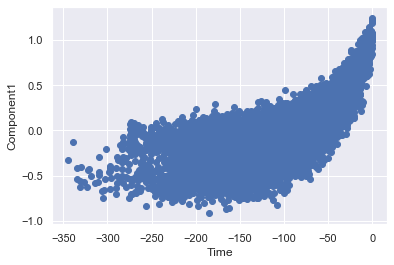

In [279]:
import seaborn as sns
sns.set()
# d = principalDf[train['OpsMode']==1]
y = principalDf['component 1']
x = principalDf['Time']
ax = plt.scatter(x ,y)
plt.ylabel('Component1')
plt.xlabel('Time')

In [310]:
#after applying PCA on the data
scaler = MinMaxScaler()
M = []
score = []
X = PCA_train
for i in range (1,7):
    Xi = X[X['OpsMode'] == i]
    Xii = Xi.drop(['OpsMode','A/C No.'],axis=1)
    Time = Xii['Time']
    Xii = Xii.drop('Time',axis=1)
    scaler.fit(Xii)
    Xii = scaler.transform(Xii)
    index_list = Xi.index.tolist()
    pca = PCA(n_components=5)
    principalComponents = pca.fit_transform(Xii)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2','component 3','component 4','component 5'])
    principalDf.index = index_list
    principalDf['Time'] = Time
    Xii = principalDf[(principalDf['Time']<-300) | (principalDf['Time']>-5)]
    yi = np.where(Xii['Time']>-5,0,1)

    Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xii, yi, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    Mi = regressor.fit(Xi_train,yi_train)
    yi_pred = Mi.predict(Xi_test)
    score.append(r2_score(yi_test,yi_pred))
    coeff_df = pd.DataFrame(Mi.coef_, columns = ['Coefficient'])
    M.append(Mi)

In [311]:
scaler = MinMaxScaler()
data = []
for i in range(1,7):
    Xi = X[X['OpsMode'] == i]
    Xii = Xi.drop(['OpsMode','A/C No.'],axis=1)
    Time = Xii['Time']
    Xii = Xii.drop('Time',axis=1)
    scaler.fit(Xii)
    Xii = scaler.transform(Xii)
    index_list = Xi.index.tolist()
    pca = PCA(n_components=5)
    principalComponents = pca.fit_transform(Xii)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2','component 3','component 4','component 5'])
    principalDf.index = index_list
    principalDf['Time'] = Time
    Xii = principalDf
    Xi = Xi.drop(['T24','T30','T50','P30','Ps30','phi','BPR','OpsMode','W32','W31'],axis = 1)
    yi = M[i-1].predict(Xii)
    Xi['HI'] = yi
    data.append(Xi)

In [312]:
df = pd.concat(data)
df.sort_index(inplace = True)

In [313]:
df

,A/C No.,Time,HI
0,1,-222,0.697729
1,1,-221,0.704228
2,1,-220,0.695381
3,1,-219,0.674670
4,1,-218,0.676649
...,...,...,...
45913,218,-4,0.001784
45914,218,-3,0.006282
45915,218,-2,-0.003054
45916,218,-1,-0.002218


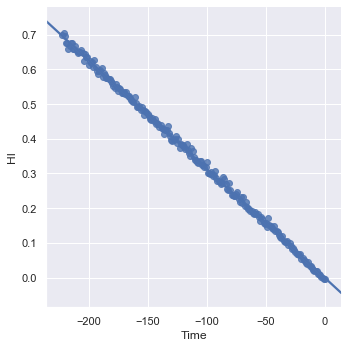

In [315]:
import seaborn as sns
sns.set()
d = df[df['A/C No.']==1]
ax = sns.lmplot(x = 'Time',y = 'HI',data = d)